In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#jupyter notebook 中的魔法函数，如果不是使用该软件请使用plt.show()用于显示图像

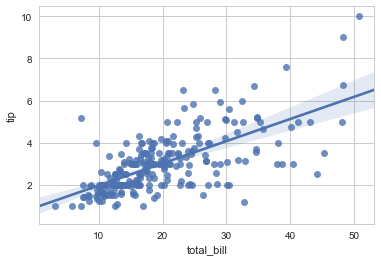

In [47]:
#Functions of creating linear regression models,regplot and lmplot
#在最简单的调用中，两个函数绘制了两个变量x和y的散点图，然后拟合回归模型y〜x并绘制了该回归线的结果回归线和95％置信区间
sns.regplot(x='total_bill',y='tip',data=tips)

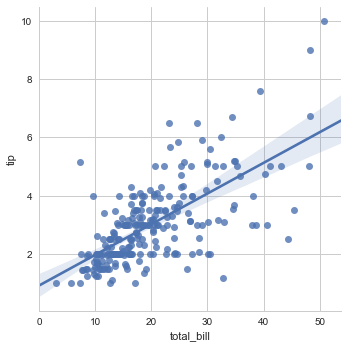

In [48]:
#这里regplot和lmplot的图像几乎一样
#一个主要区别是regplot()以各种格式接受x和y变量，包括numpy数组、Pandas的Series列或DataFrame对象的变量引用；
#不一样的是，lmplot()将数据集作为一个必需的参数，而x和y变量必须指定为字符串。这种数据格式称为“长格式”或“整洁”数据。
#除了这种输入灵活性，regplot()可以看做是拥有lmplot()特征的子集，所以后面将使用后者进行演示
sns.lmplot(x='total_bill',y='tip',data=tips)

In [ ]:
#重要函数factorplot的所有参数说明，方便参考：

#seaborn.factorplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean>, 
#                   ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='point',
#                   size=4, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, 
#                   sharey=True, margin_titles=False, facet_kws=None, **kwargs)

#Parameters：

#x,y,hue 数据集变量 变量名
#date 数据集 数据集名
#row,col 更多分类变量进行平铺显示 变量名
#col_wrap 每行的最高平铺数 整数
#estimator 在每个分类中进行矢量到标量的映射 矢量
#ci 置信区间 浮点数或None
#n_boot 计算置信区间时使用的引导迭代次数 整数
#units 采样单元的标识符，用于执行多级引导和重复测量设计 数据变量或向量数据
#order, hue_order 对应排序列表 字符串列表
#row_order, col_order 对应排序列表 字符串列表
#kind : 可选：point 默认, bar 柱形图, count 频次, box 箱体, violin 提琴, strip 散点，swarm 分散点（具体图形参考文章前部的分类介绍）
#size 每个面的高度（英寸） 标量
#aspect 纵横比 标量
#orient 方向 "v"/"h"
#color 颜色 matplotlib颜色
#palette 调色板 seaborn颜色色板或字典
#legend hue的信息面板 True/False
#legend_out 是否扩展图形，并将信息框绘制在中心右边 True/False
#share{x,y} 共享轴线 True/False
#facet_kws FacetGrid的其他参数 字典

In [6]:
#定义一个含偏移的正弦图像，来比较传统的matplotlib和seaborn的不同
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x,np.sin(x+i*.5)*(7-i)*flip)

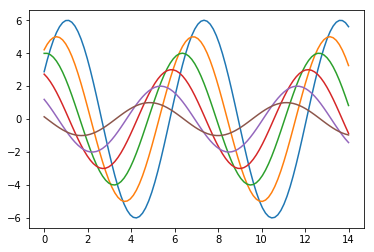

In [7]:
sinplot()

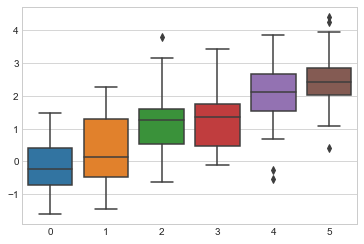

In [17]:
#Seaborn将matplotlib参数分成两个独立的组。
#第一组设定了美学风格，第二组则是不同的度量元素，这样就可以很容易地添加到代码当中了
#样式控制：axes_style() and set_style()
#有5个seaborn的主题，适用于不同的应用和人群偏好：
#darkgrid 黑色网格（默认）,whitegrid 白色网格,dark 黑色背景,white 白色背景,ticks 应该是四周都有刻度线的白背景？
sns.set_style('whitegrid')
data=np.random.normal(size=(20,6))+np.arange(6)/2
sns.boxplot(data=data)
#set和set_style的区别
#可以通过定义set_style()来定义style，全局的set()函数接受所有的matplotlib rc定义，但是set_style()只接受axes_style()提供的参数

In [23]:
#分类散点图
#显示分类变量级别中某些定量变量的值的一种简单方法使用stripplot()，它会将分散图概括为其中一个变量是分类的
sns.set(style='whitegrid',color_codes=True)
np.random.seed(sum(map(ord,'categorical')))
tips=sns.load_dataset('tips')
titanic=sns.load_dataset('titanic')
iris=sns.load_dataset('iris')

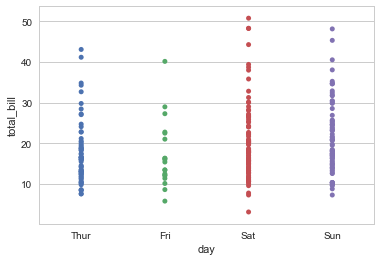

In [21]:
sns.stripplot(x='day',y='total_bill',data=tips)

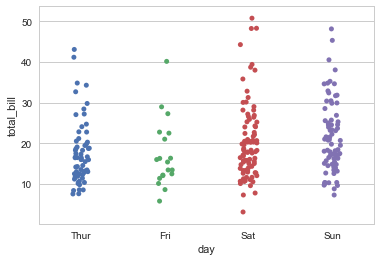

In [24]:
#在条纹图中，散点图通常将重叠。这使得很难看到数据的完整分布。一个简单的解决方案是使用一些随机的“抖动”调整位置（仅沿着分类轴）
#抖动是平时可视化中的常用的观察“密度”的方法，除了使用参数抖动，特定的抖动需求也可以用numpy在数据上处理实现
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)

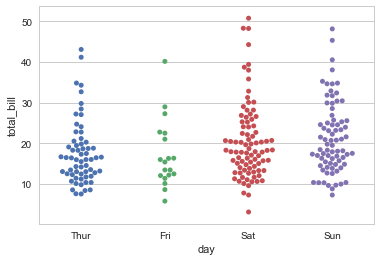

In [25]:
#不同的方法是使用函数swarmplot()，它使用避免重叠点的算法将分类轴上的每个散点图点定位：
#道理上，即使抖动还是会有重叠的可能，所以这种方法可能更好
sns.swarmplot(x='day',y='total_bill',data=tips)

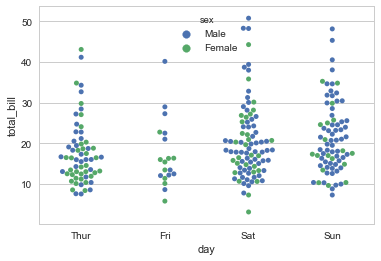

In [26]:
#当然也可以传入hue参数添加多个嵌套的分类变量。高于分类轴上的颜色和位置时冗余的，现在每个都提供有两个变量之一的信息
sns.swarmplot(x='day',y='total_bill',hue='sex',data=tips)

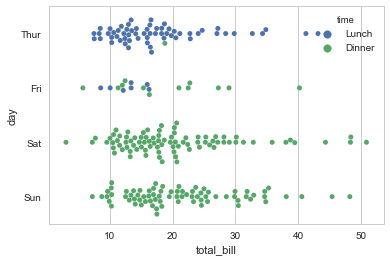

In [27]:
#将变量交换方向和轴
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips)

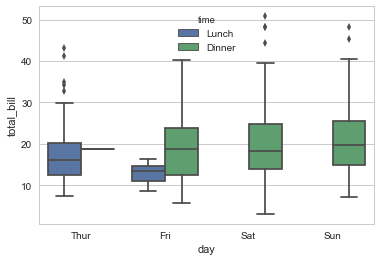

In [28]:
#分类内的观测分布
#分类散点图固然简单实用，但在某些特定的的情况下，他们可以提供的值的分布信息会变得及其有限（并不明晰）
#有几种方式可以方便的解决这个问题，在类别之间进行简单比较并汇总信息
#第一个熟悉的是boxplot
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

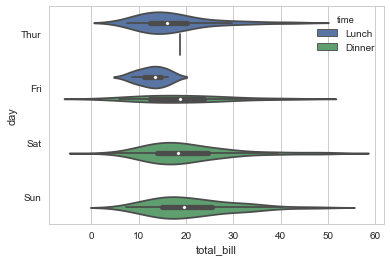

In [29]:
#不同的方法是一个violinplot()，它结合了箱体图和分布教程中描述的核心密度估计过程
sns.violinplot(x="total_bill", y="day", hue="time", data=tips)
#这种方法更好的描述了值的分布

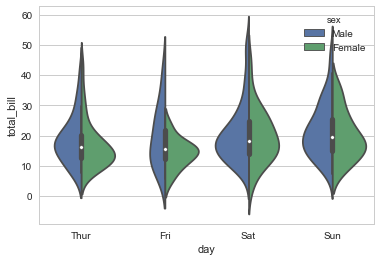

In [32]:
#当色调参数只有两个级别时，也可以传入参数split至violinplot()，这样可以更有效地利用空间
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)

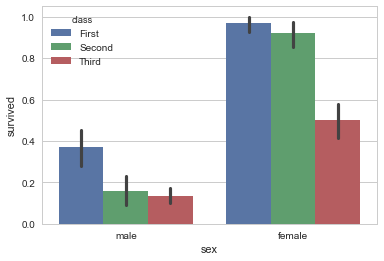

In [33]:
#类别内的统计估计
#最熟悉的方式完成这个目标是一个条形图barplot
#当在每个类别中有多个观察值时，它还使用引导来计算估计周围的置信区间，并绘制使用误差条
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

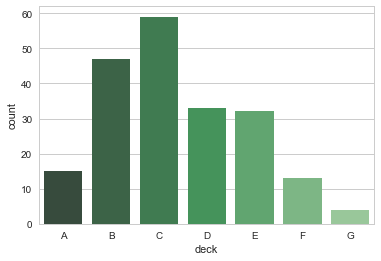

In [37]:
#条形图的特殊情况是当你想要显示每个类别中的观察次数，而不是计算第二个变量的统计量
#这类似于分类而不是定量变量的直方图。在Seaborn中，使用countplot()函数很容易绘制
#函数将默认使用count参数作为x/y中未传的一组维度
sns.countplot(x="deck", data=titanic, palette="Greens_d")

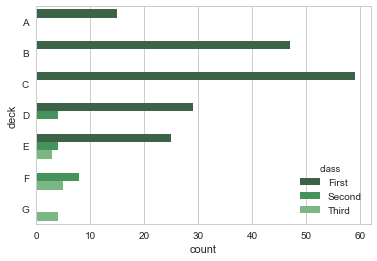

In [38]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d")

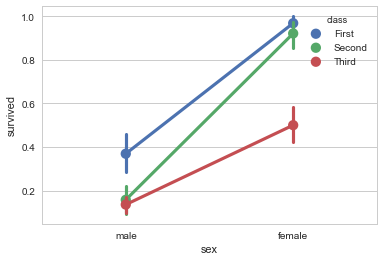

In [40]:
#Pointplotpointplot()函数提供了可视化相同信息的另一种风格
#该函数还对另一轴的高度估计值进行编码，而不是显示一个完整的柱型，它只绘制点估计和置信区间
#点图连接相同hue类别的点。这使得很容易看出主要关系如何随着第二个变量的变化而变化，因为你的眼睛很好地收集斜率的差异
sns.pointplot(x='sex',y='survived',hue='class',data=titanic)

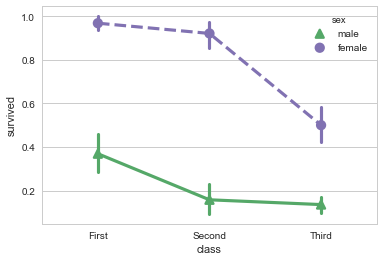

In [41]:
#为了使能够在黑白中重现的图形，可以使用不同的标记和线条样式来展示不同hue类别的层次
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"])

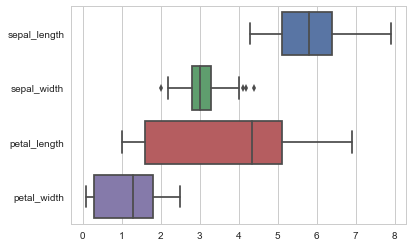

In [42]:
#绘制宽格式数据
sns.boxplot(data=iris,orient="h")

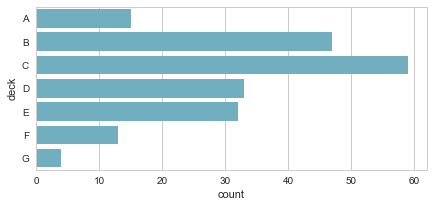

In [43]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

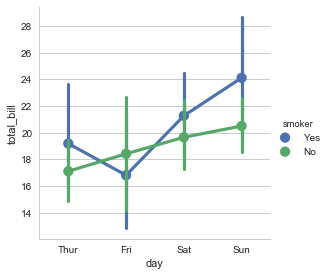

In [44]:
#绘制多层面板分类图
#默认情况下，factorplot()产生一个pairplot()
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips)

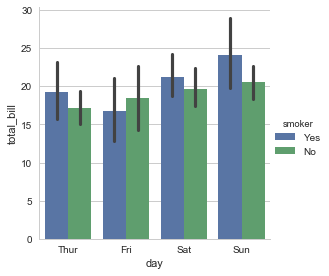

In [45]:
#kind参数可以让您选择以上讨论的任何种类的图
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar")

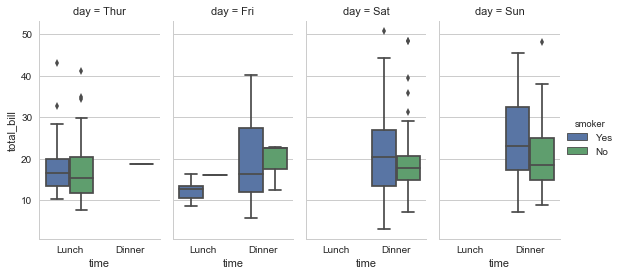

In [46]:
#任何一种图形都可以画出来。基于FacetGrid的工作原理，要更改图形的大小和形状，需要指定适用于每个方面的size和aspect参数
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5)

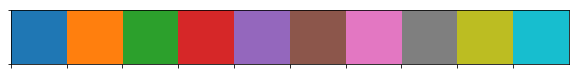

In [2]:
#定性调色板Qualitative
#默认的定性调色板，deep, muted, pastel, bright, dark, colorblind
current_palette=sns.color_palette()
sns.palplot(current_palette)

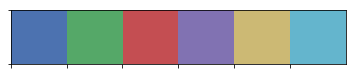

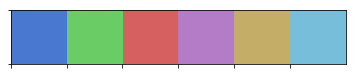

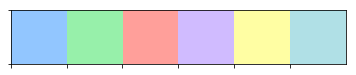

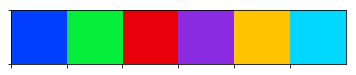

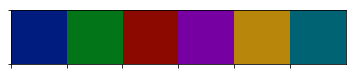

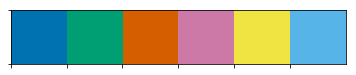

In [3]:
#定性调色板
themes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']
for theme in themes:
    current_palette = sns.color_palette(theme)
    sns.palplot(current_palette)

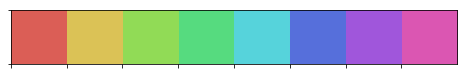

In [4]:
#环形调色板，当你想要使用超过6种以上的颜色时，可以使用这种
sns.palplot(sns.color_palette("hls", 8))

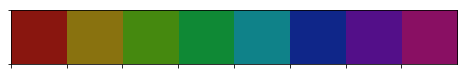

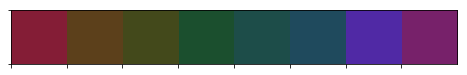

In [5]:
#环形调色板
#画出均匀色带的颜色（改变颜色，但是保持色彩的亮度和饱和度）
#hls_palette : h(hue)l(lightness)s(saturation)，均在0-1之间
sns.palplot(sns.hls_palette(8, l=.3, s=.8))
sns.palplot(sns.husl_palette(8, l=.3, s=.8))
#seaborn给hls系统提供了一个接口，可以让操作者简单容易的选择均匀分布，且亮度和饱和度看上去明显一致的色调,所以我们使用husl

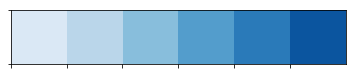

In [6]:
#这是sequential调色板，渐变色
sns.palplot(sns.color_palette('Blues'))

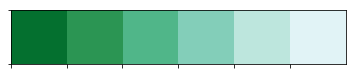

In [8]:
#想将渐变调转，就在最后加个_r
sns.palplot(sns.color_palette("BuGn_r"))

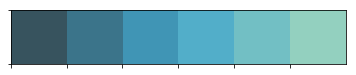

In [9]:
#在结尾加_d,将颜色进行暗处理
sns.palplot(sns.color_palette("GnBu_d"))

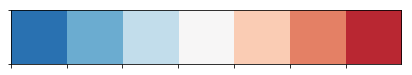

In [10]:
#Color Brewer颜色字典里有一套精心选择的离散颜色映射
sns.palplot(sns.color_palette("RdBu_r", 7))

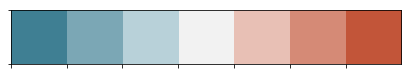

In [11]:
#同样，你也有一个函数diverging_palette可以用来创建离散颜色映射
sns.palplot(sns.diverging_palette(220, 20, n=7))